This notebook shows the code and use of PDF.py and the class PDF

# Code

In [1]:
# %load ../Tools/PDF.py
import scipy.interpolate as spip
from copy import deepcopy


class PDF():
    '''
    Class to deal with spectrum and build a PDF interpolating an histogram
    '''

    def __init__(self, histogram=[], factor=1., name='default',
                 isotope='default', volume='default', material='default',
                 interpolation='linear', labelcopy=False):
        '''
        histogram: hist to build the PDF from
        factor: factor to scale the PDF
        name: name for the PDF
        isotope, volume, material: info about PDF and hist data
        interpolation: interpolation method, as in scipy.interpolate.interp1d:
            Specifies the kind of interpolation as a string (‘linear’,
            ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic, ‘cubic’ where ‘slinear’,
            ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first,
            second or third order) or as an integer specifying the order of the
            spline interpolator to use. Default is ‘linear’.
        labelcopy: if True, the isotope, volume and material info is copied
            from hist one
        '''
        if not labelcopy:
            self.name = name
            self.isotope = isotope
            self.volume = volume
            self.material = material
        else:
            self.name = histogram.name
            self.isotope = histogram.isotope
            self.volume = histogram.volume
            self.material = histogram.material

        self.Int = factor
        self.minlim = 0
        self.maxlim = 0
        self.pdf = spip.interp1d
        self.interpolation = interpolation
        if histogram:
            self.Build_PDF(deepcopy(histogram), factor)

    def Build_PDF(self, hist, factor):
        '''
        It builds the pdf from the histogram normalazing
        that is that the integral (number of events) is
        one
        '''

        hist.Scale(float(factor)/(hist.hist.sum()))  # *hist.binsize)
        self.pdf = spip.interp1d(hist.bins, hist.hist,
                                 kind=self.interpolation, bounds_error=False)
        self.minlim = hist.bins[0]
        self.maxlim = hist.bins[-1]
        self.Int = self.pdf.y.sum()*(self.pdf.x[1]-self.pdf.x[0])

        return

    def Scale(self, factor):
        '''
        Method to scale the pdf. It also refresh the integral
        counter
        '''
        x = self.pdf.x
        y = factor*self.pdf.y
        self.pdf = spip.interp1d(x, y, kind=self.interpolation,
                                 bounds_error=False)
        self.Int *= factor
        return self


# Using code

In [2]:
import scipy as sp
import scipy.interpolate as spip
import scipy.integrate as spin
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

from Histogram import Histogram

In [9]:
#Creating histogram from a gaussian vector, mean 5 sigma 2
auxlist = np.random.normal(5,2,10000000)   
a = Histogram(auxlist,100,0,10)

In [4]:
#Creating PDF
b = PDF(a,interpolation='linear')

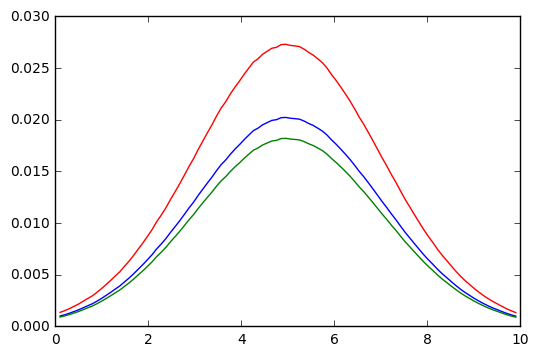

In [5]:
#Plotting and scaling PDF
x = np.linspace(0.1,9.9,100)
y = b.pdf(x)
yp = (b.Scale(0.9)).pdf(x)
ypp = (b.Scale(1.5)).pdf(x)
plt.plot(x,y)
plt.plot(x,yp)
plt.plot(x,ypp)


# Aplication to Spectrum Data

In [6]:
#reading data
import tables as tb
f = tb.open_file("../Data/data_spectrum.h5", "r")
E = f.root.E[:]
Co = f.root.Co[:]

In [7]:
#Creating hist from empty initialization adn pdf from hist
minE,maxE,nbin = 0.,3.,125 #Just for initialization, not used
h_Co = Histogram([],nbin,minE,maxE)
h_Co.hist = Co
h_Co.bins = E
pdf_Co = PDF(h_Co,1.,interpolation='linear')

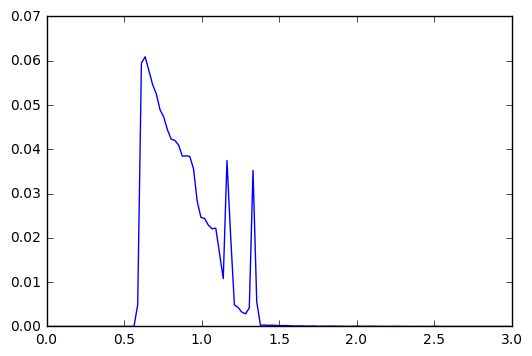

In [8]:
#ploting PDF
plt.plot(E,pdf_Co.pdf.y)